In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.chdir(r'/content')

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip

--2020-08-18 12:12:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80417803 (77M) [application/x-httpd-php]
Saving to: ‘DevanagariHandwrittenCharacterDataset.zip.1’

DevanagariHandwritt 100%[===================>]  76.69M  36.7MB/s    in 2.1s    

2020-08-18 12:12:17 (36.7 MB/s) - ‘DevanagariHandwrittenCharacterDataset.zip.1’ saved [80417803/80417803]



In [1]:
!unzip DevanagariHandwrittenCharacterDataset.zip

In [5]:
from fastai.vision import *
from fastai.metrics import accuracy

In [6]:
data = ImageDataBunch.from_folder(path = Path(r'/content/DevanagariHandwrittenCharacterDataset'), ds_tfms = get_transforms(do_flip = False), size = 228, bs = 64).normalize(imagenet_stats)

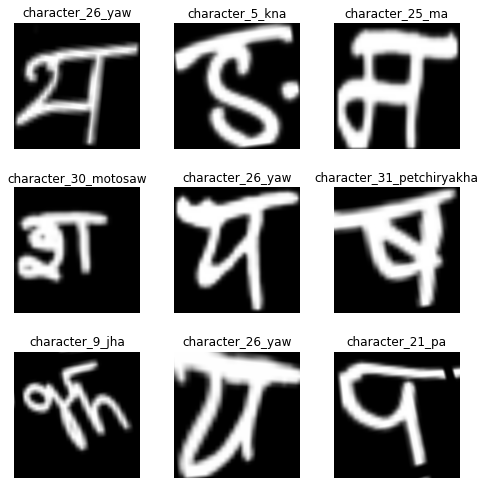

In [7]:
data.show_batch(rows = 3, figsize = (7, 7))

In [8]:
learn = cnn_learner(data, models.resnet50, metrics = accuracy, model_dir = r'/content/model' )

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.330575,0.133030,0.957174,23:54
1,0.148665,0.051309,0.984420,23:49
2,0.071016,0.027012,0.991159,23:50
3,0.063139,0.022126,0.992899,23:47


In [10]:
learn.save('Stage - 1')

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

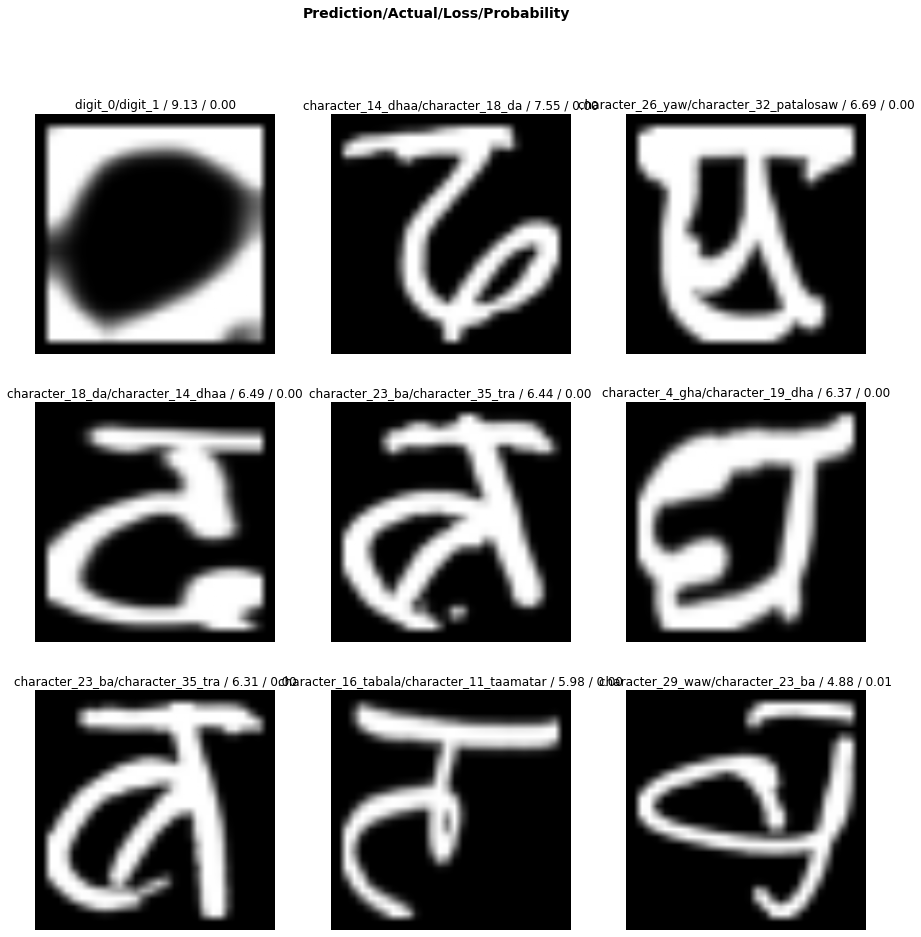

In [16]:
interp.plot_top_losses(9, figsize = (15, 15))

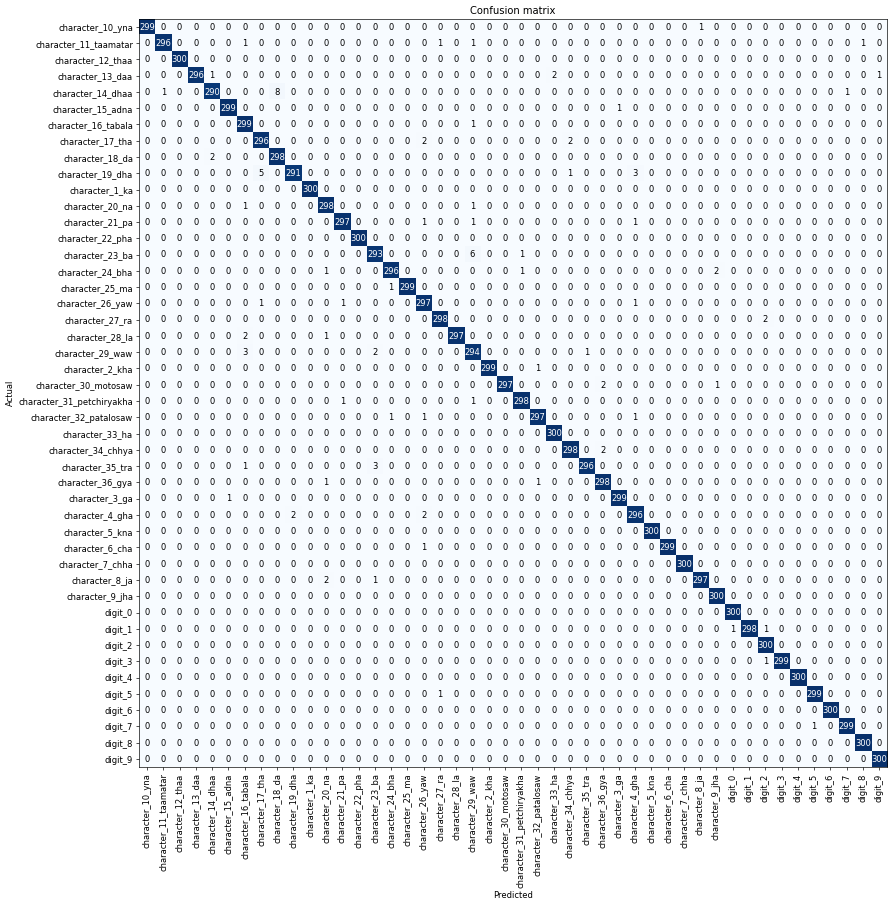

In [17]:
interp.plot_confusion_matrix(figsize = (15, 15), dpi = 60)

In [18]:
interp.most_confused(min_val = 1)

[('character_14_dhaa', 'character_18_da', 8),
 ('character_23_ba', 'character_29_waw', 6),
 ('character_19_dha', 'character_17_tha', 5),
 ('character_19_dha', 'character_4_gha', 3),
 ('character_29_waw', 'character_16_tabala', 3),
 ('character_35_tra', 'character_23_ba', 3),
 ('character_13_daa', 'character_33_ha', 2),
 ('character_17_tha', 'character_26_yaw', 2),
 ('character_17_tha', 'character_34_chhya', 2),
 ('character_18_da', 'character_14_dhaa', 2),
 ('character_24_bha', 'character_9_jha', 2),
 ('character_27_ra', 'digit_2', 2),
 ('character_28_la', 'character_16_tabala', 2),
 ('character_29_waw', 'character_23_ba', 2),
 ('character_30_motosaw', 'character_36_gya', 2),
 ('character_34_chhya', 'character_36_gya', 2),
 ('character_4_gha', 'character_19_dha', 2),
 ('character_4_gha', 'character_26_yaw', 2),
 ('character_8_ja', 'character_20_na', 2),
 ('character_10_yna', 'character_8_ja', 1),
 ('character_11_taamatar', 'character_16_tabala', 1),
 ('character_11_taamatar', 'characte